In [ ]:
!pip install pandas matplotlib seaborn
!apt-get -y install fonts-noto-cjk

In [ ]:
!apt-get update -y
!apt-get install -y fonts-noto-cjk

Get:1 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease [3,632 B]
Hit:2 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease
Get:3 http://security.ubuntu.com/ubuntu jammy-security InRelease [129 kB]
Hit:4 http://archive.ubuntu.com/ubuntu jammy InRelease
Get:5 http://archive.ubuntu.com/ubuntu jammy-updates InRelease [128 kB]
Get:6 https://r2u.stat.illinois.edu/ubuntu jammy InRelease [6,555 B]
Get:7 http://archive.ubuntu.com/ubuntu jammy-backports InRelease [127 kB]
Hit:8 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease
Hit:9 https://ppa.launchpadcontent.net/graphics-drivers/ppa/ubuntu jammy InRelease
Get:10 https://r2u.stat.illinois.edu/ubuntu jammy/main all Packages [9,019 kB]
Get:11 http://security.ubuntu.com/ubuntu jammy-security/universe amd64 Packages [1,246 kB]
Hit:12 https://ppa.launchpadcontent.net/ubuntugis/ppa/ubuntu jammy InRelease
Get:13 http://archive.ubuntu.com/ubuntu jammy-updates/main amd64 Package

## 第一部分：讀取與檢視 CSV

In [ ]:
import pandas as pd
# 讀取 CSV 檔案：
df = pd.read_csv('grades_expanded.csv')
print(df.head())

    姓名  班級  國文  數學  英文   總分
0  學生1  一戊  95  54  58  207
1  學生2  一甲  84  91  67  242
2  學生3  一丁  89  92  91  272
3  學生4  一丁  79  81  69  229
4  學生5  一丁  79  51  70  200


In [ ]:
## ✅ 一、清理與轉換
df.isnull().sum()  # 檢查缺失值
df['總分'] = df[['國文', '數學', '英文']].sum(axis=1)
df['平均'] = df[['國文', '數學', '英文']].mean(axis=1)
df['總分'] = df['總分'].astype(float)
print(df.head())

    姓名  班級  國文  數學  英文     總分         平均
0  學生1  一戊  95  54  58  207.0  69.000000
1  學生2  一甲  84  91  67  242.0  80.666667
2  學生3  一丁  89  92  91  272.0  90.666667
3  學生4  一丁  79  81  69  229.0  76.333333
4  學生5  一丁  79  51  70  200.0  66.666667


In [ ]:
## 🔍 二、條件篩選與排序
df[(df['總分'] > 250) & (df['數學'] < 70)]

,姓名,班級,國文,數學,英文,總分,平均


In [ ]:
df[df['總分'].between(220, 270)]

In [ ]:
df[['姓名', '班級', '數學']].sort_values(by='數學', ascending=False).head(5)
#ascend,descend(head=前幾個)

,姓名,班級,數學
24,學生25,一丙,97
11,學生12,一戊,96
18,學生19,一乙,92
2,學生3,一丁,92
7,學生8,一丙,91


In [ ]:
df_一甲 = df[df['班級'] == '一甲']
df_一甲

,姓名,班級,國文,數學,英文,總分,平均
1,學生2,一甲,84,91,67,242.0,80.666667
9,學生10,一甲,69,88,68,225.0,75.000000
10,學生11,一甲,92,61,76,229.0,76.333333
14,學生15,一甲,95,50,86,231.0,77.000000
17,學生18,一甲,94,62,55,211.0,70.333333
21,學生22,一甲,65,54,58,177.0,59.000000
23,學生24,一甲,77,54,68,199.0,66.333333


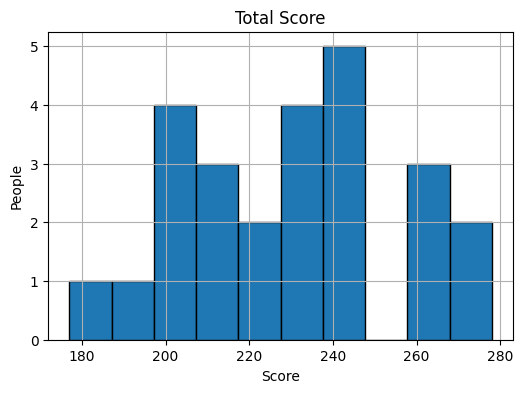

In [ ]:
## 📊 三、視覺化練習
import matplotlib.pyplot as plt
# plt.rcParams['font.family'] = 'Noto Sans CJK TC'  # 設定為台灣中文字體（可自動 fallback）

# 直方圖：總分分布（抓出總分畫圖）
df['總分'].hist(bins=10, figsize=(6, 4), edgecolor='black')
plt.title('Total Score')
plt.xlabel('Score')
plt.ylabel('People')
plt.show()

<ipython-input-35-1580225426>:5: UserWarning: Glyph 19968 (\N{CJK UNIFIED IDEOGRAPH-4E00}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-35-1580225426>:5: UserWarning: Glyph 30002 (\N{CJK UNIFIED IDEOGRAPH-7532}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-35-1580225426>:5: UserWarning: Glyph 20057 (\N{CJK UNIFIED IDEOGRAPH-4E59}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-35-1580225426>:5: UserWarning: Glyph 25098 (\N{CJK UNIFIED IDEOGRAPH-620A}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-35-1580225426>:5: UserWarning: Glyph 19969 (\N{CJK UNIFIED IDEOGRAPH-4E01}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-35-1580225426>:5: UserWarning: Glyph 19993 (\N{CJK UNIFIED IDEOGRAPH-4E19}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-35-1580225426>:5: UserWarning: Glyph 29677 (\N{CJK UNIFIED IDEOGRAPH-73ED}) missing from font(s) DejaVu Sans.

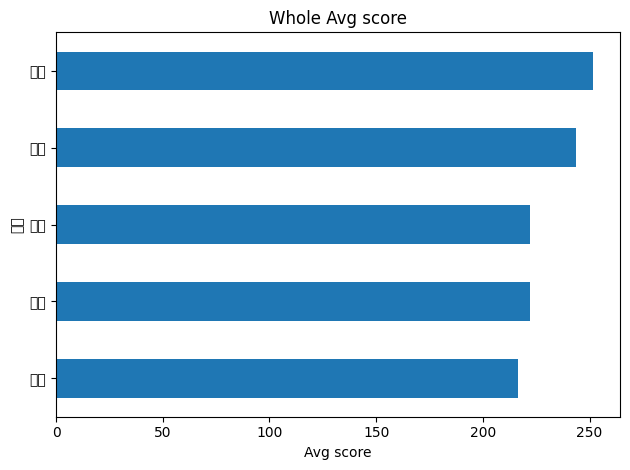

In [ ]:
# 各班平均總分長條圖
df.groupby('班級')['總分'].mean().sort_values().plot(kind='barh')
plt.title('Whole Avg score')
plt.xlabel('Avg score')
plt.tight_layout()
plt.show()

In [ ]:
df['國文'].mean()


np.float64(81.44)

In [ ]:
df.groupby('班級')['國文'].mean()


In [ ]:
## 🧪 四、進階挑戰題
# 每班前三名

In [ ]:
top_all = df.sort_values(by='總分', ascending=False)
print(top_all)

      姓名  班級  國文  數學  英文     總分         平均
6    學生7  一丁  99  89  90  278.0  92.666667
2    學生3  一丁  89  92  91  272.0  90.666667
24  學生25  一丙  75  97  94  266.0  88.666667
7    學生8  一丙  92  91  78  261.0  87.000000
16  學生17  一乙  88  85  85  258.0  86.000000
11  學生12  一戊  91  96  60  247.0  82.333333
18  學生19  一乙  60  92  91  243.0  81.000000
22  學生23  一丁  98  56  89  243.0  81.000000
1    學生2  一甲  84  91  67  242.0  80.666667
20  學生21  一丁  96  61  84  241.0  80.333333
14  學生15  一甲  95  50  86  231.0  77.000000
3    學生4  一丁  79  81  69  229.0  76.333333
10  學生11  一甲  92  61  76  229.0  76.333333
12  學生13  一丙  70  68  90  228.0  76.000000
9   學生10  一甲  69  88  68  225.0  75.000000
19  學生20  一戊  60  70  89  219.0  73.000000
8    學生9  一戊  61  85  70  216.0  72.000000
13  學生14  一乙  83  77  55  215.0  71.666667
17  學生18  一甲  94  62  55  211.0  70.333333
0    學生1  一戊  95  54  58  207.0  69.000000
4    學生5  一丁  79  51  70  200.0  66.666667
5    學生6  一乙  74  51  75  200.0  66.666667
23  學生24  一

In [ ]:
# 每班前三名
top3 = df.sort_values(by=['班級', '總分'], ascending=[True, False])
# 對 DataFrame df 進行排序：
# 第一個排序鍵：'班級'（升冪） → 將所有資料依照班級排序（例如一甲、一乙、一丙...）
# 第二個排序鍵：'總分'（降冪） → 在每個班級內部，把學生按總分從高到低排序
# 這樣排序後，每個班級的高分學生就會集中在前面。
print(top3)

      姓名  班級  國文  數學  英文     總分         平均
6    學生7  一丁  99  89  90  278.0  92.666667
2    學生3  一丁  89  92  91  272.0  90.666667
22  學生23  一丁  98  56  89  243.0  81.000000
20  學生21  一丁  96  61  84  241.0  80.333333
3    學生4  一丁  79  81  69  229.0  76.333333
4    學生5  一丁  79  51  70  200.0  66.666667
24  學生25  一丙  75  97  94  266.0  88.666667
7    學生8  一丙  92  91  78  261.0  87.000000
12  學生13  一丙  70  68  90  228.0  76.000000
16  學生17  一乙  88  85  85  258.0  86.000000
18  學生19  一乙  60  92  91  243.0  81.000000
13  學生14  一乙  83  77  55  215.0  71.666667
5    學生6  一乙  74  51  75  200.0  66.666667
15  學生16  一乙  71  64  60  195.0  65.000000
11  學生12  一戊  91  96  60  247.0  82.333333
19  學生20  一戊  60  70  89  219.0  73.000000
8    學生9  一戊  61  85  70  216.0  72.000000
0    學生1  一戊  95  54  58  207.0  69.000000
1    學生2  一甲  84  91  67  242.0  80.666667
14  學生15  一甲  95  50  86  231.0  77.000000
10  學生11  一甲  92  61  76  229.0  76.333333
9   學生10  一甲  69  88  68  225.0  75.000000
17  學生18  一

In [ ]:
top3.groupby('班級').head(3)
# 針對排序後的 top3 資料：
# 對每個「班級」進行 groupby 群組
# 在每個群組中選取前 3 筆資料（也就是總分最高的前三名）
# 這樣你就會得到一個新 DataFrame，裡面包含「每一班的前三名學生資料」。

,姓名,班級,國文,數學,英文,總分,平均
6,學生7,一丁,99,89,90,278.0,92.666667
2,學生3,一丁,89,92,91,272.0,90.666667
22,學生23,一丁,98,56,89,243.0,81.000000
24,學生25,一丙,75,97,94,266.0,88.666667
7,學生8,一丙,92,91,78,261.0,87.000000
12,學生13,一丙,70,68,90,228.0,76.000000
16,學生17,一乙,88,85,85,258.0,86.000000
18,學生19,一乙,60,92,91,243.0,81.000000
13,學生14,一乙,83,77,55,215.0,71.666667
11,學生12,一戊,91,96,60,247.0,82.333333


In [ ]:
# 分類：優秀/普通/不及格
def classify(score):
    if score >= 270:
        return '優秀'
    elif score >= 240:
        return '普通'
    else:
        return '需加強'

df['等第'] = df['總分'].apply(classify)
# 將 classify() 函數套用到整欄的「總分」欄位，一個一個去評分，產生一個新的欄位 等第 存放結果。
# apply(classify) 是 Pandas 中「將函數作用於每一列」的常見用法。

df[['姓名', '總分', '等第']]

,姓名,總分,等第
0,學生1,207.0,需加強
1,學生2,242.0,普通
2,學生3,272.0,優秀
3,學生4,229.0,需加強
4,學生5,200.0,需加強
5,學生6,200.0,需加強
6,學生7,278.0,優秀
7,學生8,261.0,普通
8,學生9,216.0,需加強
9,學生10,225.0,需加強


In [ ]:
# 分箱：高/中/低 分群
df['分群'] = pd.qcut(df['總分'], 3, labels=['低', '中', '高'])
df[['姓名', '總分', '分群']]

# pd.qcut() 是 Pandas 提供的分位數分箱工具，會根據數據的排序，將資料平均分成幾組（數據數量盡量平均）。
# 3 表示分成三組（分三等份）
# labels=['低', '中', '高']：為三組分別指定標籤
# 這行會自動將學生總分從低到高排序後分為：
# 前 1/3 的學生 → 標記為「低」
# 中間 1/3 → 標記為「中」
# 後 1/3 → 標記為「高」



,姓名,總分,分群
0,學生1,207.0,低
1,學生2,242.0,中
2,學生3,272.0,高
3,學生4,229.0,中
4,學生5,200.0,低
5,學生6,200.0,低
6,學生7,278.0,高
7,學生8,261.0,高
8,學生9,216.0,低
9,學生10,225.0,中


In [ ]:
!pip install numpy
!apt-get -y install fonts-noto-cjk

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
Suggested packages:
  fonts-noto-cjk-extra
The following NEW packages will be installed:
  fonts-noto-cjk
0 upgraded, 1 newly installed, 0 to remove and 35 not upgraded.
Need to get 61.2 MB of archives.
After this operation, 93.2 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/main amd64 fonts-noto-cjk all 1:20220127+repack1-1 [61.2 MB]
Fetched 61.2 MB in 4s (16.4 MB/s)
Selecting previously unselected package fonts-noto-cjk.
(Reading database ... 126111 files and directories currently installed.)
Preparing to unpack .../fonts-noto-cjk_1%3a20220127+repack1-1_all.deb ...
Unpacking fonts-noto-cjk (1:20220127+repack1-1) ...
Setting up fonts-noto-cjk (1:20220127+repack1-1) ...
Processing triggers for fontconfig (2.13.1-4.2ubuntu5) ...


##  Pandas 進階實戰教學
本課程涵蓋：
- 合併與串接
- Apply / Lambda 自訂轉換
- GroupBy 進階與多重聚合
- Pivot Table 樞紐分析
- 時間序列分析
- 任務挑戰與視覺化

In [ ]:
# Pandas 進階實戰教學
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
## 📦 1. Merge 與 Concat 範例
# 建立學生資料
df1 = pd.DataFrame({
    '學號': [1, 2, 3],
    '姓名': ['小明', '小美', '小強'],
    '性別': ['男', '女', '男']
})
# 建立成績資料
df2 = pd.DataFrame({
    '學號': [1, 2, 3],
    '數學': [80, 95, 70],
    '英文': [75, 85, 65]
})
pd.merge(df1, df2, on='學號')

,學號,姓名,性別,數學,英文
0,1,小明,男,80,75
1,2,小美,女,95,85
2,3,小強,男,70,65


In [ ]:
## 🔁 2. Apply 搭配 Lambda
# 加總並分類
df = pd.read_csv('grades_expanded.csv')
df['總分'] = df[['國文', '數學', '英文']].sum(axis=1)
df['是否及格'] = df['數學'].apply(lambda x: '及格' if x >= 60 else '不及格')
# 根據每位學生的數學成績，自動判斷是否及格，並新增一欄 '是否及格' 到 DataFrame 中。
df[['姓名', '數學', '是否及格']].head()

,姓名,數學,是否及格
0,學生1,54,不及格
1,學生2,91,及格
2,學生3,92,及格
3,學生4,81,及格
4,學生5,51,不及格


In [ ]:
## 📊 3. GroupBy 多重統計
df.groupby('班級').agg({
    '總分': ['mean', 'max', 'count'],
    '英文': 'mean'
})

總分                    英文
          mean  max count       mean
班級                                  
一丁  243.833333  278     6  82.166667
一丙  251.666667  266     3  87.333333
一乙  222.200000  258     5  73.200000
一戊  222.250000  247     4  69.250000
一甲  216.285714  242     7  68.285714

In [ ]:
## 🧮 4. Pivot Table 樞紐分析
df['性別'] = np.random.choice(['男', '女'], size=len(df))
pd.pivot_table(df, index='班級', columns='性別', values='總分', aggfunc='mean')

性別,女,男
班級,,
一丁,254.000000,233.666667
一丙,251.666667,NaN
一乙,200.000000,227.750000
一戊,NaN,222.250000
一甲,210.800000,230.000000


/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 37329 (\N{CJK UNIFIED IDEOGRAPH-91D1}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 38989 (\N{CJK UNIFIED IDEOGRAPH-984D}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 27599 (\N{CJK UNIFIED IDEOGRAPH-6BCF}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 26085 (\N{CJK UNIFIED IDEOGRAPH-65E5}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 37559 (\N{CJK UNIFIED IDEOGRAPH-92B7}) missing from font(s) DejaVu Sans.
  fig.canvas

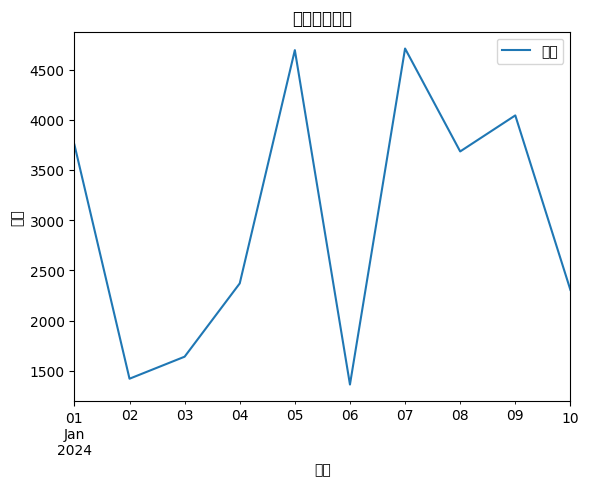

In [ ]:
## 📅 5. 時間序列處理
# 建立日期與銷售
sales = pd.DataFrame({
    '日期': pd.date_range(start='2024-01-01', periods=10),
    '金額': np.random.randint(1000, 5000, size=10)
})
sales.set_index('日期').resample('D').sum().plot(title='每日銷售趨勢')
plt.ylabel('金額')
plt.show()

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 20998 (\N{CJK UNIFIED IDEOGRAPH-5206}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 32676 (\N{CJK UNIFIED IDEOGRAPH-7FA4}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


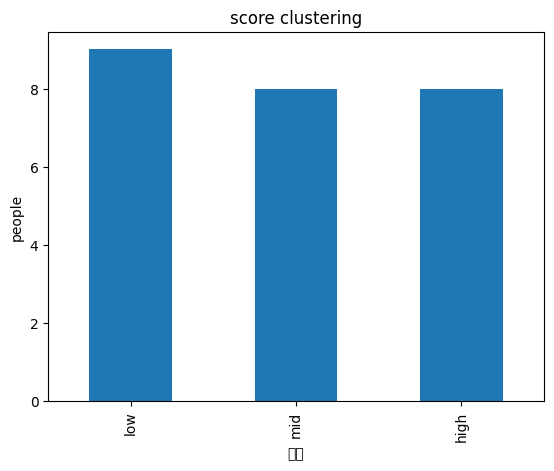

In [ ]:
## 🎯 6. 分群統計與視覺化任務
# 分群分類（高、中、低）
df['分群'] = pd.qcut(df['總分'], 3, labels=['low', 'mid', 'high'])
df['分群'].value_counts().plot(kind='bar', title='score clustering')
plt.ylabel('people')
plt.show()